 # Pandas 
 
 
Profesores: Luz Eunice Angeles /José Ignacio Treviño

**Fecha:** marzo 2020
 ## 1. Lectura de archivos csv
 Lectura de **csv** de google drive


## Lectura de csv local ( Subir archivos desde el sistema de archivos local)

<code>files.upload</code> muestra un diccionario de los archivos que se cargaron.
El diccionario está codificado según el nombre de archivo y los valores son los datos que se subieron.

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('Se cargó el archivo: "{name}" con una longitud de {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv
Se cargó el archivo: "tmdb_5000_movies.csv" con una longitud de 5698602 bytes


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['tmdb_5000_movies.csv'].decode('utf-8')))
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [ ]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# 2. Librería Pandas

Es una librería Open Source, de alto desempeño, fácil de usar y con herramientas de análisis para los desarrolladores de Python.



## Crear Series o listas con panda

Crear una Serie [ `Series`] al pasar una lista de valores

In [ ]:
 import numpy as np
 
 s = pd.Series([1, 3, 5, np.nan, 6, 8])
 s


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

¿Qué valor obtendé de la siguiente instrucción?

In [ ]:
s[0]

1.0

?

?

?

?
**Nota:** Es importante considerar que los indices inician en **0 ( cero)**

## Crear un data Frame 




Generar un `DataFrame` que contenga números aleatorios en donde los "índices" sean las fechas desde el primero de enero de 2020 hasta el 6 de enero de 2020 y tenga 4 columnas con el nombre de: A, B, C, D.

In [ ]:
dates = pd.date_range('20200101', periods=6)
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,-1.417503,-2.463378,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,-1.717870,-0.246500,-0.579708,-1.514644


Generar números consecutivos

In [ ]:
list(range(4))

[0, 1, 2, 3]

Generar un  DataFrame con diferentes objetos.

In [ ]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20200101'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': pd.Series(2, index=list(range(4)), dtype='float32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,2.0,test,foo
1,1.0,2020-01-01,1.0,2.0,train,foo
2,1.0,2020-01-01,1.0,2.0,test,foo
3,1.0,2020-01-01,1.0,2.0,train,foo


Obtener los tipos de datos del DataFrame

¿Cuál es el tipo de dato de la primera columna "A"?
?

??
?

?


In [ ]:
 df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D           float32
E          category
F            object
dtype: object

## Visualizar los primeros y los últimos valores de un data set

Recordando en R la instrucción era `head(dataFrame,n=N)` 

¿Cómo será en Python para los primeros y los últimos valores?

Primeros 5 valores de DataFrame df

In [ ]:
df.head(n=5)

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,-1.417503,-2.463378,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890


Últimos 4 valores del DataFrame df

In [ ]:
df.tail(n=4)

,A,B,C,D
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,-1.717870,-0.246500,-0.579708,-1.514644


## Métricas descriptivas
Obtener el conteo, el promedio, mínimo, cuartiles y máximos de los valores del DataFrame por columna.

In [ ]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.494705,-0.320028,0.261265,0.219680
std,1.763015,1.112076,0.846030,1.389094
min,-1.717870,-2.463378,-0.626256,-1.514644
25%,-0.910987,-0.335661,-0.453540,-0.481171
50%,0.710826,-0.014871,0.171682,-0.237158
75%,1.832040,0.289446,0.827281,1.398406
max,2.510262,0.624659,1.466618,1.925952


## Transponer la información 

Es decir, las columnas en indices y los indices en columnas

De esta forma : 

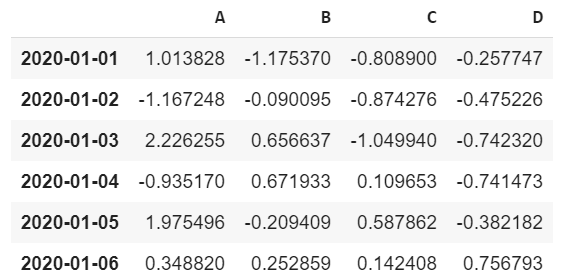



a esta forma: 

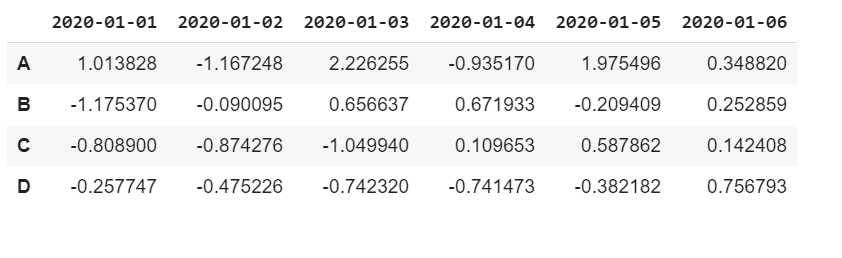





In [ ]:
df.T

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06
A,2.171689,-1.417503,2.510262,0.813092,0.608561,-1.717870
B,0.624659,-2.463378,0.216759,-0.365381,0.313675,-0.246500
C,0.418400,-0.626256,-0.075037,1.466618,0.963575,-0.579708
D,0.001954,1.925952,-0.482804,-0.476270,1.863890,-1.514644


## Selección de Información

### Seleccionar columnas
Seleccionar los valores de la columna 'A' del dataFrame df

In [ ]:
df["A"]



2020-01-01    2.171689
2020-01-02   -1.417503
2020-01-03    2.510262
2020-01-04    0.813092
2020-01-05    0.608561
2020-01-06   -1.717870
Freq: D, Name: A, dtype: float64

In [ ]:
df['A']

2020-01-01    2.171689
2020-01-02   -1.417503
2020-01-03    2.510262
2020-01-04    0.813092
2020-01-05    0.608561
2020-01-06   -1.717870
Freq: D, Name: A, dtype: float64

df.A 
¿Obtendrá el mismo resultado anterior?
?

?

?

In [ ]:
df.A

2020-01-01    2.171689
2020-01-02   -1.417503
2020-01-03    2.510262
2020-01-04    0.813092
2020-01-05    0.608561
2020-01-06   -1.717870
Freq: D, Name: A, dtype: float64

In [ ]:
 df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

### Seleccionar renglones

Seleccionar los primeros 3 renglones del dataFrame df


In [ ]:
df[0:3]


,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,-1.417503,-2.463378,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804


In [ ]:
df

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,-1.417503,-2.463378,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,-1.717870,-0.246500,-0.579708,-1.514644


In [ ]:
df['2020-01-01':'2020-01-03']

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,-1.417503,-2.463378,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804


### Seleccionar con "Labels"

Seleccionar la columna "A" y "B" del dataFrame df

Seleccionar un valor en específico. Ejemplo fecha '2020-01-01' en la columna "A"

In [ ]:
df.loc[dates[0], 'A']

2.171689138434392

### Seleccionar por posición

Seleccionar los renglones con indice 2020-01-04 y 2020-01-05 además de las columnas A y B

In [ ]:
df.iloc[3:5, 0:2]

,A,B
2020-01-04,0.813092,-0.365381
2020-01-05,0.608561,0.313675


Seleccionar un valor en especifico ejemplo el valor en la columna A en el renglon 2020-01-01 Ejemplo;

In [ ]:
df

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,-1.417503,-2.463378,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,-1.717870,-0.246500,-0.579708,-1.514644


In [ ]:

df.iloc[0,0]

2.171689138434392

## Filtrar valores 

Mostrar los valores del dataFrame df cuyos valores sean mayor a 0 (cero)

In [ ]:

df[df > 0]

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,NaN,NaN,NaN,1.925952
2020-01-03,2.510262,0.216759,NaN,NaN
2020-01-04,0.813092,NaN,1.466618,NaN
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,NaN,NaN,NaN,NaN


Mostrar solo los valores del dataFrame df en los que cumplan con el criterio de que la columna A sea mayor a cero.

In [ ]:
df[df.A > 0]

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890


In [ ]:
df

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,-1.417503,-2.463378,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,-1.717870,-0.246500,-0.579708,-1.514644


Mostrar los valores del DataFrame df2 y en donde los valores de la columna E esten en la lista ['test','otro']

In [ ]:
df2[df2['E'].isin(['test','otro'])]

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,2.0,test,foo
2,1.0,2020-01-01,1.0,2.0,test,foo


In [ ]:
df2

,A,B,C,D,E,F
0,1.0,2020-01-01,1.0,2.0,test,foo
1,1.0,2020-01-01,1.0,2.0,train,foo
2,1.0,2020-01-01,1.0,2.0,test,foo
3,1.0,2020-01-01,1.0,2.0,train,foo


 ## Información  faltante

In [ ]:
df3=df[df > -.9]
df3

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,NaN,NaN,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,NaN,-0.246500,-0.579708,NaN


Eliminar el renglon en donde no haya información en la columna A del data frame df3.

In [ ]:
df3.dropna(how='any')

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890


In [ ]:
df3

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,NaN,NaN,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,NaN,-0.246500,-0.579708,NaN


Rellenar con el valor de 10 los valores "NaN"

In [ ]:
df3.fillna(value=10)

,A,B,C,D
2020-01-01,2.171689,0.624659,0.418400,0.001954
2020-01-02,10.000000,10.000000,-0.626256,1.925952
2020-01-03,2.510262,0.216759,-0.075037,-0.482804
2020-01-04,0.813092,-0.365381,1.466618,-0.476270
2020-01-05,0.608561,0.313675,0.963575,1.863890
2020-01-06,10.000000,-0.246500,-0.579708,10.000000


# 3. Funciones

## Descripción

 - Una función se crea utilizando ``def`` seguido del nombre de la función y los parámetros de la función entre paréntesis.
 - Se puede asignar valores predeterminados para los parámetros.
 - Es muy importante la identación. Python no utiliza llaves para definir los niveles. 
 - Para salir de la función, se utiliza la expresión ``return``. 

Ejemplo:Función que suma x+y cuando z no esta presenta sino suma x+y+z
  ```
  def add_numbers(x,y,z=None):
    if (z==None):
        return x+y
    else:
        return x+y+z

print(add_numbers(1, 2))
print(add_numbers(1, 2, 3))
```

In [1]:
 def add_numbers(x,y,z=None):
    if (z==None):
        return x+y
    else:
        return x+y+z
 
print(add_numbers(1, 2))
print(add_numbers(1, 2, 3))

3
6


# 4. Agrupadores

In [ ]:
 df4 = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                    'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

Agrupar la tabla df4 con base a la columna A y realizar la suma de la columna Cy D

In [ ]:
df4

,A,B,C,D
0,foo,one,0.419864,0.181204
1,bar,one,0.190399,0.381685
2,foo,two,1.421105,-0.783413
3,bar,three,0.619202,-1.544783
4,foo,two,0.229839,0.551049
5,bar,two,1.131971,1.120125
6,foo,one,1.729932,1.125409
7,foo,three,1.377578,1.871358


In [ ]:
df4.groupby('A').sum()


,C,D
A,,
bar,1.941572,-0.042973
foo,5.178317,2.945607


In [ ]:
df4.groupby('A').mean()

,C,D
A,,
bar,0.647191,-0.014324
foo,1.035663,0.589121


Agrupar la tabla df4 con base a la columna A y B además realizar la suma de la columna Cy D

In [ ]:
df4.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.190399  0.381685
    three  0.619202 -1.544783
    two    1.131971  1.120125
foo one    2.149796  1.306613
    three  1.377578  1.871358
    two    1.650943 -0.232364

# 4.1 Ordenar

Ordenar con base en una variable

In [ ]:
ordenA= df4.groupby('A').sum()
ordenA=ordenA.sort_values(by='A', ascending=False)
ordenA

,C,D
A,,
foo,5.178317,2.945607
bar,1.941572,-0.042973


Ordenar con base en varias variables

In [ ]:
ordenA= df4.groupby(['A','B']).sum()
ordenA=ordenA.sort_values(by=['A','B'], ascending=True)
ordenA

C         D
A   B                        
bar one    0.190399  0.381685
    three  0.619202 -1.544783
    two    1.131971  1.120125
foo one    2.149796  1.306613
    three  1.377578  1.871358
    two    1.650943 -0.232364

# 5. Union ( Merges)

DataFrame.merge(left, 
  right, 
  how='inner', 
  on=None, 
  left_on=None, 
  right_on=None, 
  left_index=False, 
  right_index=False, 
  sort=False, 
  suffixes=('_x', '_y'), 
  copy=True, 
  indicator=False, 
  validate=None)[source]
Merge DataFrame or named Series objects with a database-style join.



In [ ]:
 import pandas as pd
# Cliente-Producto
cust_prod = {'Customer_id':pd.Series([1,2,3,4,5,6]),
  'Product':pd.Series(['Oven','Oven','Oven','Television','Television','Television'])}
cust_prod = pd.DataFrame(cust_prod)
cust_prod


,Customer_id,Product
0,1,Oven
1,2,Oven
2,3,Oven
3,4,Television
4,5,Television
5,6,Television


In [ ]:
 
# Localidad cliente
clie_loc = {'Customer_id':pd.Series([2,4,6]),
    'State':pd.Series(['California','California','Texas'])}
clie_loc = pd.DataFrame(clie_loc)
clie_loc

,Customer_id,State
0,2,California
1,4,California
2,6,Texas


In [ ]:
%whos

Variable    Type             Data/Info
--------------------------------------
clie_loc    DataFrame           Customer_id       Stat<...>            6       Texas
cust_prod   DataFrame           Customer_id     Produc<...>            6  Television
dates       DatetimeIndex    DatetimeIndex(['2020-01-0<...>atetime64[ns]', freq='D')
df          DataFrame                           A     <...>24334  0.082127  0.868140
df2         DataFrame             A          B    C   <...>-01  1.0  2.0  train  foo
df3         DataFrame                           A     <...>  NaN  0.082127  0.868140
df4         DataFrame             A      B         C  <...>three  1.377578  1.871358
files       module           <module 'google.colab.fil<...>s/google/colab/files.py'>
fn          str              tmdb_5000_movies.csv
io          module           <module 'io' from '/usr/lib/python3.6/io.py'>
np          module           <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
ordenA      DataFrame           

## Left

Regresa todos los valores de la tabla izquierda

In [ ]:
pd.merge(clie_loc, cust_prod, on='Customer_id', how='left')

,Customer_id,State,Product
0,2,California,Oven
1,4,California,Television
2,6,Texas,Television


## Right 

Regresa todos los valores de la tabla derecha

In [ ]:
pd.merge(clie_loc, cust_prod, on='Customer_id', how='right')

,Customer_id,State,Product
0,2,California,Oven
1,4,California,Television
2,6,Texas,Television
3,1,NaN,Oven
4,3,NaN,Oven
5,5,NaN,Television


## Inner Join

Regresa solo los renglones en donde existen cohincidencias.

In [ ]:
pd.merge(clie_loc, cust_prod, on='Customer_id', how='inner')

,Customer_id,State,Product
0,2,California,Oven
1,4,California,Television
2,6,Texas,Television


# 6. For y While

## For



```
for counter in range(1, 6):
  ....: print counter
```
can also be written like this:

```
	numbers = range(1,6)
	for count in numbers:
	    print (count)
```
en texto 

```
word = "computer"
for letter in word:
    print (letter)
```

In [ ]:
numbers = range(1,6)
for count in numbers:
  print (count)

1
2
3
4
5


Generar el Código para mostrar letra por letra  la frase "Hola Mundo"

In [ ]:
mensaje = "Hola Mundo"
for letter in mensaje:
    print (letter)

H
o
l
a
 
M
u
n
d
o


In [ ]:
word = 'Hola Mundo'
for letter in word:
    print (letter)

## While

In [ ]:
a = 0		
while a <= 10:	
   a = a + 1	
   print (a)

1
2
3
4
5
6
7
8
9
10
11


In [ ]:
a = 0		
while a <= 10:
  print (a)	
  a = a + 1	
   

0
1
2
3
4
5
6
7
8
9
10
